## 신경망 모델에서 옵티마이저 사용법
- 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

### 1. Adam Optimizer

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Adam 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다


In [17]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0
            , amsgrad=False)

In [18]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)

In [20]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9825


[0.05580076575279236, 0.9824561476707458]

In [21]:
y_acc = hist.history['accuracy']
y_loss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

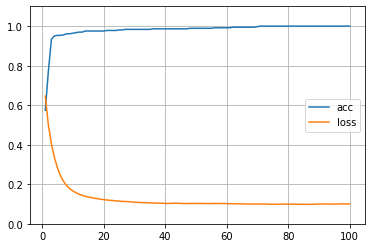

In [22]:
plt.plot(xs, y_acc, label='acc')
plt.plot(xs, y_loss, label='loss')
plt.ylim([0,1.1])
plt.grid()
plt.legend()
plt.show()

#### RMSProp 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.


In [23]:
from tensorflow.keras.optimizers import RMSprop

rmsp = RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [32]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
model.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [34]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)

In [35]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9737


[0.24113067984580994, 0.9736841917037964]

In [36]:
y_acc = hist.history['accuracy']
y_loss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

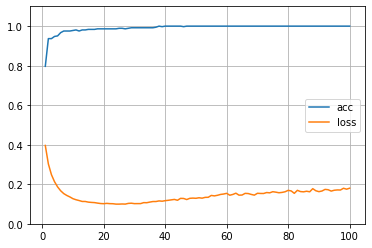

In [37]:
plt.plot(xs, y_acc, label='acc')
plt.plot(xs, y_loss, label='loss')
plt.ylim([0,1.1])
plt.grid()
plt.legend()
plt.show()